"DataOperations" adlı bir class oluşturmanız.  

Bu class'ta şunların olmasını bekliyoruz:
* Eğer class oluşturulurken bir numpy array'i verilirse bunu pandas dataframe'ine çevirerek kaydetmesi,
* Eğer bir path verilirse, ve bu path'de csv ya da json dosyası varsa bunu veriyi bir pandas dataframe'ine kaydetmesi,
* Eğer direk olarak pandas dataframe'i verilirse de herhangi bir değişiklik yapmadan kaydetmesi,
* Eğer herhangi bir değer verilmeden class oluşturulursa, rastgele bir veri seti oluşturmanız gerekmekte.
* Class oluşturulduktan sonra ise bu veri üzerine analiz çıkartabilecek fonksiyonlar yazmanızı bekliyoruz:
    * Her sütundaki veri sayısı ve tipi, eğer sayısal veriler varsa standart sapma, ortalama gibi istatistiksel değerlerini veren bir fonksiyon,
    * Sayısal veriler içeren sütunların görselleştirilmesi.
* Tüm fonksiyonlara ve ana class içeriğine Docstringlerini yazmaya, isimlendirmeleri Python kurallarına göre yapmaya dikkat etmeye çalışın lütfen.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# OPTION 1

In [2]:
class Data_Operations1():
    
    """
    Docstring for class
    """
       
    def __init__(self,data):
        self.data = data
       
    def read_numpy_array(self):
        df = pd.DataFrame(self.data)
        return df

    def read_pandas_dataframe(self):
        df = self.data
        return df
            
    def read_path(self):
        if '.csv' in self.data:
            df = pd.read_csv(self.data)
        
        elif '.json'in self.data:
            df = pd.read_json(self.data)
            
        else:
            df = self.data
            
        return df

# OPTION 2

In [3]:
class Data_Operations2():
    
    """
    Docstring for class
    """
       
    def __init__(self,data):
        self.data = data
       
    def read_file(self):

        if str(type(self.data)) == "<class 'numpy.ndarray'>":
            df = pd.DataFrame(self.data)

        elif str(type(self.data)) == "<class 'pandas.core.frame.DataFrame'>":
            df = self.data
            
        else:
            if '.csv' in self.data:
                df = pd.read_csv(self.data)
        
            elif '.json'in self.data:
                df = pd.read_json(self.data)
            
            else:
                df = self.data
            
        return df

# OPTION 3

In [4]:
class Data_Operations3():
    
    """
    Docstring for class
    """
       
    def __init__(self,data=np.random.rand(100,2)):
        self.data = data
             
    def __call__(self):
            
        if isinstance(self.data,np.ndarray):
            df = pd.DataFrame(self.data)

        elif isinstance(self.data,pd.core.frame.DataFrame):
            df = self.data

        else:
            if '.csv' in self.data:
                df = pd.read_csv(self.data)

            elif '.json'in self.data:
                df = pd.read_json(self.data)

            else:
                df = self.data

        return df

# FINAL CLASS

In [13]:
class Data_Operations():
    
    """
    Convert numpy array, json and csv files to pandas dataframe. If given data is already a pandas dataframe, 
    read it as a dataframe.
    
    Give statistical information about the numerical columns.
    
    Visualize the dataframe as boxplot and scatterplot.
    """
       
    def __init__(self,data=np.random.rand(100,2),df=pd.DataFrame()):
        self.data = data
        self.df = df
           
    def read_file(self):
        
        """
        Read numpy array, json string and csv file; convert to a dataframe. Default data: np.random.rand(100,2). 
        """
        
        if isinstance(self.data,np.ndarray):
            self.df = pd.DataFrame(self.data)

        elif isinstance(self.data,pd.core.frame.DataFrame):
            self.df = self.data
                        
        else:
            if self.data.endswith('.csv'):
                self.df = pd.read_csv(self.data)
        
            elif self.data.endswith('.json'):
                self.df = pd.read_json(self.data)
            
            else:
                self.df = self.data
            
        return self.df
    
    def describe(self):
        
        """
        Calculate statistical data of count, mean, std, min, max, %25, %50 and %75 quartile values.
        """
        
        return self.df.describe()
    
    def bar_plot(self, var1, var2, hue=None, color=None):
        
        """
        Show point estimates and confidence intervals as rectangular bars.
        
        Parameters:
        -----------
        var1, var2 : Names of variables in dataframe.
        hue        : Optional.
        color      : Color for all of the elements, optional.
        """
        
        sns.barplot(x=var1, y=var2, data=self.df, hue=hue, color=color)
        plt.show()
    
    def scatter_plot(self,var1,var2,hue=None, marker='o'):
        
        """
        Draw a scatter plot.
        
        Parameters:
        -----------
        var1, var2 : Names of variables that specify positions on the x and y axes.
        hue        : Optional.
        marker     : Object determining how to draw the markers for different levels of the style variable.         
    
        """
        
        sns.scatterplot(x=var1, y=var2, data=self.df, hue=hue, marker=marker)
        plt.show()

In [3]:
csv_dataset = Data_Operations(data = 'cement_slump.csv')
csv_dataset.read_file()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82
...,...,...,...,...,...,...,...,...,...,...
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0,49.97
99,248.0,101.0,239.9,169.1,7.7,949.9,644.1,2.0,20.0,50.23
100,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0,20.0,50.50
101,297.1,40.9,239.9,194.0,7.5,908.9,651.8,27.5,67.0,49.17


In [4]:
csv_dataset.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000
mean,229.894175,77.973786,149.014563,197.167961,8.539806,883.978641,739.604854,18.048544,49.61068,36.038738
std,78.877230,60.461363,85.418080,20.208158,2.807530,88.391393,63.342117,8.750844,17.56861,7.837120
min,137.000000,0.000000,0.000000,160.000000,4.400000,708.000000,640.600000,0.000000,20.00000,17.190000
25%,152.000000,0.050000,115.500000,180.000000,6.000000,819.500000,684.500000,14.500000,38.50000,30.900000
50%,248.000000,100.000000,164.000000,196.000000,8.000000,879.000000,742.700000,21.500000,54.00000,35.520000
75%,303.900000,125.000000,235.950000,209.500000,10.000000,952.800000,788.000000,24.000000,63.75000,41.205000
max,374.000000,193.000000,260.000000,240.000000,19.000000,1049.900000,902.000000,29.000000,78.00000,58.530000


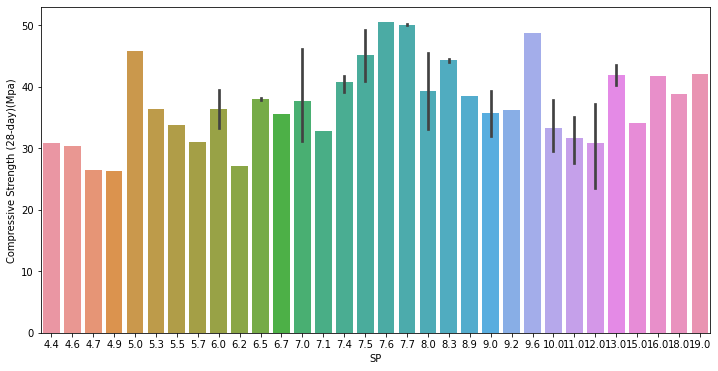

In [8]:
plt.figure(figsize = (12,6))
csv_dataset.bar_plot(var1 = 'SP', var2 = 'Compressive Strength (28-day)(Mpa)')

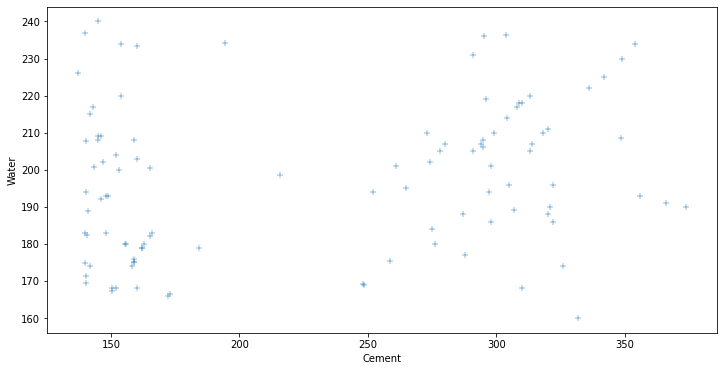

In [9]:
plt.figure(figsize = (12,6))
csv_dataset.scatter_plot(var1 = 'Cement', var2 = 'Water', marker = '+')

In [5]:
json_dataset = Data_Operations('iris.json')
json_dataset.read_file()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
json_dataset.describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


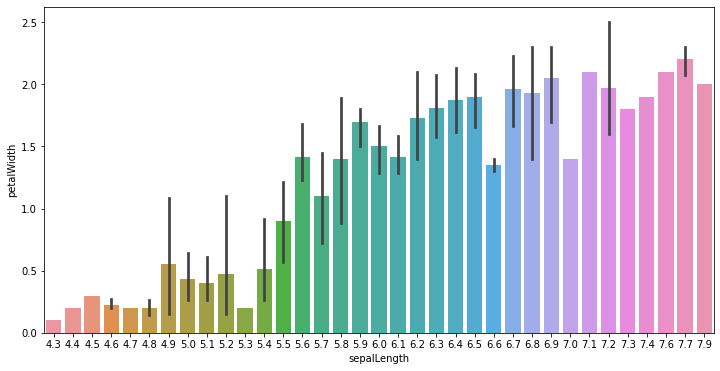

In [12]:
plt.figure(figsize = (12,6))
json_dataset.bar_plot(var1 = 'sepalLength', var2 = 'petalWidth')

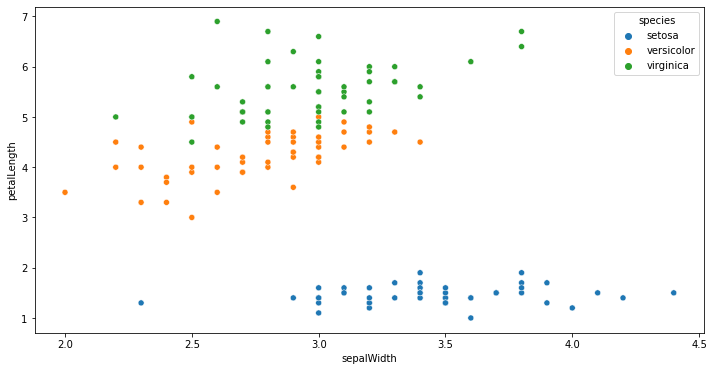

In [13]:
plt.figure(figsize = (12,6))
json_dataset.scatter_plot(var1 = 'sepalWidth', var2 = 'petalLength', hue = 'species')

In [15]:
numpy_dataset = Data_Operations(np.array([0,1,2,4,5,6]))
numpy_dataset.read_file()

,0
0,0
1,1
2,2
3,4
4,5
5,6


In [8]:
numpy_dataset.describe()

,0
count,6.000000
mean,3.000000
std,2.366432
min,0.000000
25%,1.250000
50%,3.000000
75%,4.750000
max,6.000000


In [9]:
dataframe = np.array([0,1,2,4,5,6])

In [10]:
pandas_dataset = Data_Operations(dataframe)
pandas_dataset.read_file()

,0
0,0
1,1
2,2
3,4
4,5
5,6


In [11]:
pandas_dataset.describe()

,0
count,6.000000
mean,3.000000
std,2.366432
min,0.000000
25%,1.250000
50%,3.000000
75%,4.750000
max,6.000000


In [19]:
default_dataset = Data_Operations()
default_dataset.read_file()

,0,1
0,0.932173,0.607020
1,0.058972,0.233389
2,0.368343,0.969898
3,0.299331,0.522888
4,0.058099,0.214505
...,...,...
95,0.206509,0.034142
96,0.029707,0.811600
97,0.704001,0.248047
98,0.380546,0.468164


In [20]:
default_dataset.describe()

,0,1
count,100.000000,100.000000
mean,0.446542,0.493864
std,0.284270,0.285727
min,0.010235,0.008265
25%,0.220082,0.230741
50%,0.435050,0.482167
75%,0.652533,0.731872
max,0.986778,0.969898


In [17]:
! pylint DataOperations.py

************* Module DataOperations
DataOperations.py:1:0: C0103: Module name "DataOperations" doesn't conform to snake_case naming style (invalid-name)
DataOperations.py:1:0: C0114: Missing module docstring (missing-module-docstring)

------------------------------------------------------------------

Your code has been rated at 9.61/10 (previous run: 9.41/10, +0.20)



